<a href="https://colab.research.google.com/github/HamburgermanA3445/chesspredictionmodels/blob/main/Chess_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

chessData.csv can be downloaded through https://www.kaggle.com/datasets/ronakbadhe/chess-evaluations?resource=download

In [ ]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [ ]:
df = pd.read_csv('chessData.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

In [ ]:
evals = df['Evaluation'].head(100)
pos = df['FEN'].head(100)
d=0
b={
    'p': 1,
    'b': 3,
    'n': 3,
    'r': 5,
    'q': 9,
    'k': 100,
    'P': -1,
    'B': -3,
    'N': -3,
    'R': -5,
    'Q': -9,
    'K': -100
}

for c in range(len(evals)):
  evals[c]=int(evals[c].replace('#',''))

for x in range(len(pos)):
  temp=[]
  for z in list(filter(None, pos[x].split(' ')[0].split('/'))):
      for y in z:
          if y.isnumeric():
              for a in list('0'*int(y)):
                  d+=int(a)
          else:
              d+=b[y]
      temp.append(d)
      d=0
  pos[x]=temp

In [ ]:
X, y = pos.tolist(), evals.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [ ]:
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 10000
batch_size = 10
batch_start = torch.arange(0, len(X_train), batch_size)

best_mse = np.inf
best_weights = None
history = []

NameError: ignored

In [ ]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            bar.set_postfix(mse=float(loss))
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

MSE: 28776.35
RMSE: 169.64


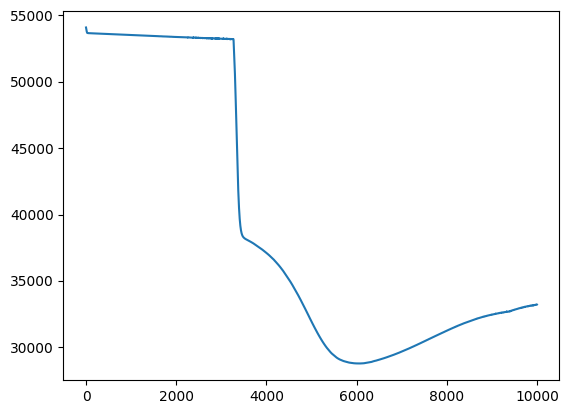

In [ ]:
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

NameError: ignored